In [12]:
import sys
sys.path.append('./../')

import xml.etree.ElementTree as ET
import numpy as np
import ikamoana
import xarray as xr
import matplotlib.pyplot as plt
import os
import parcels
from ikamoana.utils import fieldToDataArray, convertToMeters, seapodymFieldConstructor

- deltaT :  30.0
- dt_seconds :  2592000.0
- d_max :  [232.70947686]
- d_max :  [333.64806618]
- d_max :  [441.4436696]
- d_max :  [553.20500752]
- d_max :  [666.91757418]
- d_inf :  [1452.65010868]
- d_inf :  [2082.74242257]
- d_inf :  [2755.63850371]
- d_inf :  [3453.29002123]
- d_inf :  [4163.12175883]

In [13]:
fh = xr.load_dataarray("./../data/Inna/Modified_skj_cohort_habitat_20080115-20080515_20080115.nc")
my_sim = ikamoana.IkaSeapodym('./../data/ikamoana_config/IkaSim_Example_Fish.xml')
my_sim.loadFields(from_habitat=fh)

 It will also add +1 to sigma_min. Cf. function documentation for more details.
deltaT :  30.0
dt_seconds :  2592000.0
d_inf :  [1452.65010868]
d_max :  [232.70947686]
d_inf :  [2082.74242257]
d_max :  [333.64806618]
d_inf :  [2755.63850371]
d_max :  [441.4436696]
d_inf :  [3453.29002123]
d_max :  [553.20500752]
d_inf :  [4163.12175883]
d_max :  [666.91757418]


In [14]:
advection_x_ika = fieldToDataArray(my_sim.ocean.Tx) + fieldToDataArray(my_sim.ocean.U)
advection_y_ika = fieldToDataArray(my_sim.ocean.Ty) + fieldToDataArray(my_sim.ocean.V)
diffusion_ika = fieldToDataArray(my_sim.ocean.Ky)

time_length = len(diffusion_ika.time)

advection_x_sea = xr.load_dataarray("./../data/Inna/skj_cohort_advection_x_20080115-20100715.nc")
advection_y_sea = xr.load_dataarray("./../data/Inna/skj_cohort_advection_y_20080115-20100715.nc")
diffusion_sea = xr.load_dataarray("./../data/Inna/skj_cohort_diffusion_20080115-20100715.nc")

advection_x_sea = advection_x_sea[0,:5].loc[:, -39.5:50.5, 119.5:289.5]
advection_y_sea = advection_y_sea[0,:5].loc[:, -39.5:50.5, 119.5:289.5]
diffusion_sea = diffusion_sea[0,:5].loc[:, -39.5:50.5, 119.5:289.5]

advection_x_sea = convertToMeters(advection_x_sea, timestep=30*24*60*60)
advection_y_sea = convertToMeters(advection_y_sea, timestep=30*24*60*60)
diffusion_sea = convertToMeters(diffusion_sea, timestep=30*24*60*60, square=True)

In [15]:
for i in range(diffusion_ika.time.size) :
    print(float(diffusion_sea[i].max() / diffusion_ika[i].max()))

30.031803131103516
30.076595306396484
30.036787033081055
30.04444122314453
29.99327850341797


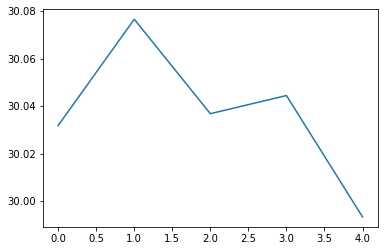

In [16]:
plt.plot([float(diffusion_sea[i].max() / diffusion_ika[i].max()) for i in range(5)])

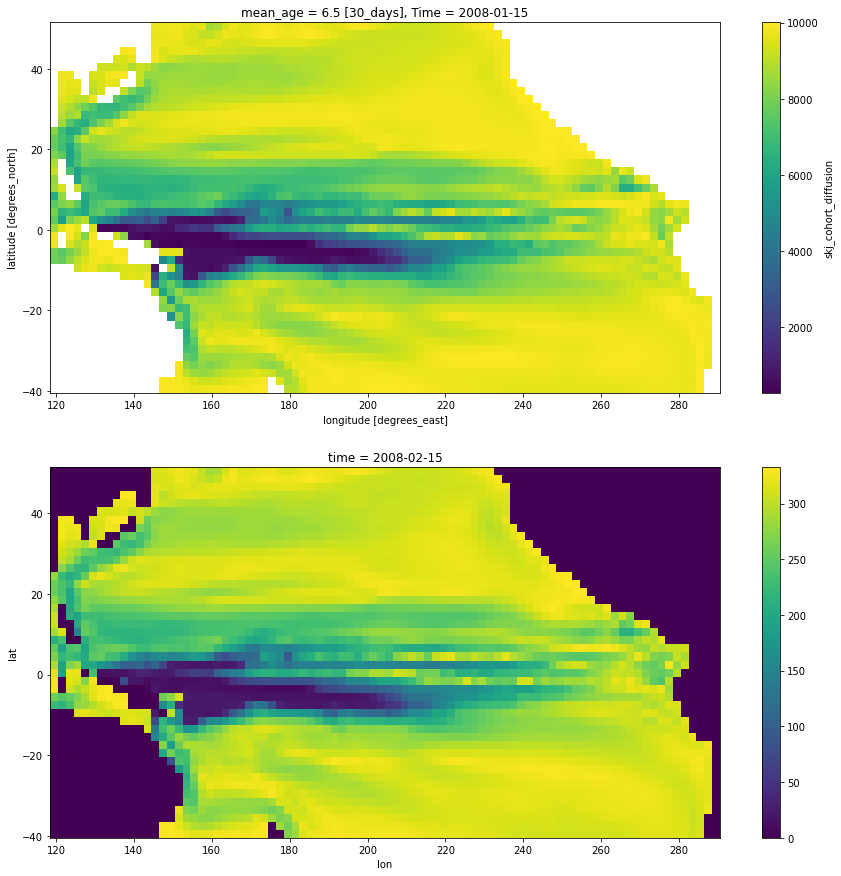

In [17]:
age_to_plot = 1

f,(a1,a2) = plt.subplots(2,1,figsize=(15,15))
diffusion_sea[age_to_plot].plot(ax=a1)
diffusion_ika[age_to_plot].plot(ax=a2)

In [18]:
print("MEAN :")
print(np.abs(advection_x_sea).mean().data)
print(np.abs(advection_y_sea).mean().data)
print(np.abs(diffusion_sea).mean().data)
print("MAX :")
print(np.abs(advection_x_sea).max().data)
print(np.abs(advection_y_sea).max().data)
print(np.abs(diffusion_sea).max().data)

MEAN :
0.036208812
0.015695605
10823.21
MAX :
0.5586679
0.22007976
19975.768


In [19]:
print("MEAN :")
print(np.abs(advection_x_ika).mean().data)
print(np.abs(advection_y_ika).mean().data)
print(np.abs(diffusion_ika).mean().data)
print("MAX :")
print(np.abs(advection_x_ika).max().data)
print(np.abs(advection_y_ika).max().data)
print(np.abs(diffusion_ika).max().data)

MEAN :
0.046438184
0.0178675
277.5683
MAX :
0.81453097
0.33680406
666.0081
